\title{Examen 2 Modelos Estadísticos I}
 \author{Roberto Vásquez Martínez}
 \date{01/Mayo/2021}
 \maketitle

# Problema 1 #

In [29]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
import warnings
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV
import seaborn as sns

np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)
warnings.filterwarnings("ignore")



## inciso a) ##

In [2]:
dataP1=pd.read_csv('EcoMex.csv')
#dataP1.head()

In [3]:
dataP1_log=dataP1.drop(['obs','CPR','RQR','YPDR','TCR'],axis=1)
dataP1_log=dataP1_log[['lrqr','lydr','ltcr','lcpr']]
#dataP1_log.head()

In [4]:
dataP1_not_log=dataP1.drop(['obs','lcpr','lrqr','lydr','ltcr'],axis=1)
dataP1_not_log=dataP1_not_log[['RQR','YPDR','TCR','CPR']]
#dataP1_not_log.head()

In [5]:
# Matriz de correlación 

cor_matrixP1_log=dataP1_log.corr()
print(cor_matrixP1_log)

          lrqr      lydr      ltcr      lcpr
lrqr  1.000000  0.963260 -0.528662  0.970701
lydr  0.963260  1.000000 -0.491817  0.982644
ltcr -0.528662 -0.491817  1.000000 -0.523598
lcpr  0.970701  0.982644 -0.523598  1.000000


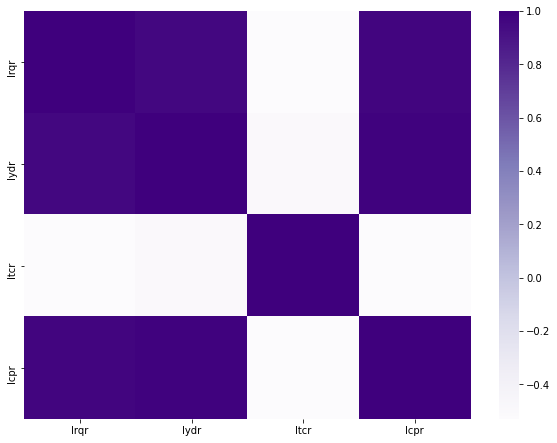

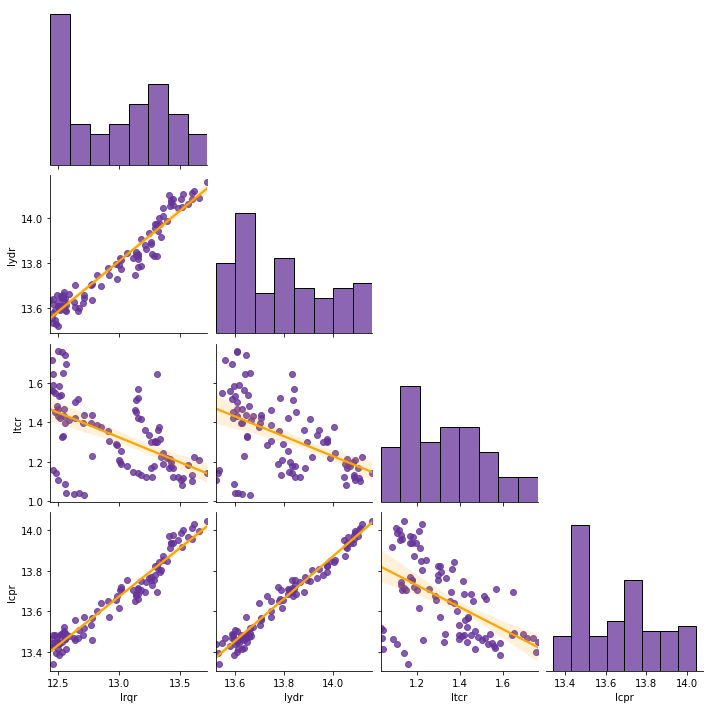

In [19]:
# Gráficas dispersion y correlación

plt.figure(figsize=(10,7.5))
sns.heatmap(cor_matrixP1_log, cmap='Purples')
sns.pairplot(dataP1_log, kind="reg", corner = True,
    plot_kws={'line_kws':{'color':'orange'}, 'scatter_kws': {'color': 'rebeccapurple'}},
    diag_kws={'color': 'rebeccapurple'})

Aquí observamos que la respuesta está fuerte correlacionada con $lrqr$ y $lydr$, no tanto con $ltcr$, sin embargo $lrqr$ y $lydr$ están muy correlacionadas entre sí, por lo que pueden ser fuente de un problema de multicolinealidad.

In [7]:
# Numero de condición y factores de inflación
variables_P1_log=dataP1_log.drop('lcpr',axis=1)
Z=variables_P1_log.corr()

invZ=np.linalg.inv(Z)

print('Matriz de correlaciones:')
print(Z)
eigs = np.linalg.eigvals(Z)
condition_number = np.sqrt(eigs.max() / eigs.min())
print('\nNumero de condicion:')
print(condition_number)
print('\nFactores de inflación de la varianza')
print(np.diag(invZ))


Matriz de correlaciones:
          lrqr      lydr      ltcr
lrqr  1.000000  0.963260 -0.528662
lydr  0.963260  1.000000 -0.491817
ltcr -0.528662 -0.491817  1.000000

Numero de condicion:
8.105050137288766

Factores de inflación de la varianza
[14.67313 13.9454   1.39605]


Aquí vemos que las variables $lrqr$ y $lydr$ presentan factores de inflación preocupante, y como $ltcr$ no parece se linealmente dependiente a estas variables por su factor de inflación, entonces el problema de multicolinealidad esta en la relación de las variables $lrqr$ y $lydr$.

## inciso b) ##

Probaremos dos modelos de regresión en la que elegimos $lydr$ o $lrqr$ pero no ambos y la variable $ltcr$. Primero consideramos el siguiente modelo 
\begin{equation}
\label{modelo 1}
lcpr=\beta_0+\beta_1lrqr+\beta_2ltcr+\varepsilon
\end{equation}

In [8]:
Xmodel_lrqr=np.column_stack([np.ones(dataP1_log.shape[0]),dataP1_log['lrqr'],dataP1_log['ltcr']])
model_lrqr=sm.OLS(dataP1_log['lcpr'],Xmodel_lrqr).fit() 
model_lrqr.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.941    
Dependent Variable: lcpr             AIC:                -311.6399
Date:               2021-05-01 11:40 BIC:                -303.9468
No. Observations:   96               Log-Likelihood:     158.82   
Df Model:           2                F-statistic:        760.9    
Df Residuals:       93               Prob (F-statistic): 2.27e-58 
R-squared:          0.942            Scale:              0.0022097
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const        7.5040     0.2122   35.3545   0.0000    7.0825   7.9255
x1           0.4759     0.0145   32.8506   0.0000    0.4472   0.5047
x2          -0.0151     0.0305   -0.4936   0.6228   -0.0756   0.0455
------------------------------------------------------------------
Omnibus:              2.185         Durbin-Watson:           0.795
Prob(Omnibus):        0.335         Jarque-Bera (JB):        1.874
Skew:                 -0.216        Prob(JB):                0.392
Kurtosis:             2.469         Condition No.:           583  
==================================================================

"""

Ahora consideramos el siguiente modelo 
\begin{equation}
\label{modelo 2}
lcrp=\beta_0+\beta_1lydr+\beta_2ltcr+\varepsilon
\end{equation}

In [9]:
Xmodel_lydr=np.column_stack([np.ones(dataP1_log.shape[0]),dataP1_log['lydr'],dataP1_log['ltcr']])
model_lydr=sm.OLS(dataP1_log['lcpr'],Xmodel_lydr).fit() 
model_lydr.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.967    
Dependent Variable: lcpr             AIC:                -367.2528
Date:               2021-05-01 11:40 BIC:                -359.5598
No. Observations:   96               Log-Likelihood:     186.63   
Df Model:           2                F-statistic:        1395.    
Df Residuals:       93               Prob (F-statistic): 4.54e-70 
R-squared:          0.968            Scale:              0.0012381
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      -0.3139     0.3297   -0.9520   0.3436   -0.9687    0.3409
x1          1.0181     0.0228   44.7109   0.0000    0.9729    1.0634
x2         -0.0553     0.0223   -2.4859   0.0147   -0.0996   -0.0111
------------------------------------------------------------------
Omnibus:               0.913        Durbin-Watson:           1.523
Prob(Omnibus):         0.634        Jarque-Bera (JB):        0.973
Skew:                  0.222        Prob(JB):                0.615
Kurtosis:              2.783        Condition No.:           1280 
==================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

Vemos en el resultado anterior que el intercepto parece ser no significativo, hacemos la regresión con el siguiente modelo  
\begin{equation*}
lcrp=\beta_1lydr+\beta_2ltcr+\varepsilon
\end{equation*}

Obtenemos

In [10]:
Xmodel_lydr_not_intercept=np.column_stack([dataP1_log['lydr'],dataP1_log['ltcr']])
model_lydr_not_intercept=sm.OLS(dataP1_log['lcpr'],Xmodel_lydr_not_intercept).fit() 
model_lydr_not_intercept.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 1.000    
Dependent Variable:     lcpr             AIC:                         -368.3218
Date:                   2021-05-01 11:40 BIC:                         -363.1931
No. Observations:       96               Log-Likelihood:              186.16   
Df Model:               2                F-statistic:                 7.239e+06
Df Residuals:           94               Prob (F-statistic):          1.52e-244
R-squared (uncentered): 1.000            Scale:                       0.0012369
------------------------------------------------------------------------------------
            Coef.       Std.Err.         t          P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
x1          0.9965        0.0018      554.1352      0.0000       0.9930       1.0001
x2         -0.0672        0.0185       -3.6393      0.0004      -0.1038      -0.0305
-------------------------------------------------------------------------------
Omnibus:                    0.191            Durbin-Watson:               1.482
Prob(Omnibus):              0.909            Jarque-Bera (JB):            0.309
Skew:                       0.097            Prob(JB):                    0.857
Kurtosis:                   2.801            Condition No.:               72   
===============================================================================

"""

A pesar de tener mejor desempeño respecto al AIC, la diferencia no es importante. Nos quedamos con el modelo 2 pues no sabemos si es natural tener intercepto 0 para este modelo. Evaluamos la multicolinealidad de este modelo seleccionado.

In [11]:
# Analisis de multicolinealidad para el modelo 2

# Matriz de correlaciones
X_means=np.mean(Xmodel_lydr_not_intercept,axis=0)
X_center=Xmodel_lydr_not_intercept-X_means
X_norms=np.linalg.norm(X_center,axis=0)
Xmodel_lydr_norm = X_center/X_norms

Z=Xmodel_lydr_norm.T@Xmodel_lydr_norm
invZ=np.linalg.inv(Z)

print('Matriz de correlaciones:')
print(Z)
eigs = np.linalg.eigvals(Z)
condition_number = np.sqrt(eigs.max() / eigs.min())
print('\nNumero de condicion:')
print(condition_number)
print('\nFactores de inflación de la varianza')
print(np.diag(invZ))

Matriz de correlaciones:
[[ 1.      -0.49182]
 [-0.49182  1.     ]]

Numero de condicion:
1.7133563686155995

Factores de inflación de la varianza
[1.31906 1.31906]


De los resultados anteriores obtenemos un modelo sin problemas de multicolinealidad y que tiene un comportamiento razonable

## inciso c) ##

Hacemos regresión Ridge usando validación cruzada para calcular el parámetro de sesgo $k$. 

In [12]:
# Estimacion para el parámetro de sesgo CV

XmodelP1_complete=dataP1_log.drop('lcpr',axis=1)
YmodelP1_complete=dataP1_log['lcpr']
n_lambdas=200
lambdas = np.logspace(-5, 2, n_lambdas)
model_ridge_P1_CV = RidgeCV(alphas=lambdas,fit_intercept=True).fit(XmodelP1_complete, YmodelP1_complete)
R2_ridge=model_ridge_P1_CV.score(XmodelP1_complete,YmodelP1_complete)
hat_y_CV=model_ridge_P1_CV.predict(XmodelP1_complete)


print('K_CV:')
print(model_ridge_P1_CV.alpha_)
print('\nParametros Ridge Problema 1 (CV)')
print(model_ridge_P1_CV.coef_)
print('\nR2 Problema 1 (CV Auto)')
print(R2_ridge)
MSE_CV = mean_squared_error(YmodelP1_complete, hat_y_CV)
print('\nCoeficientes Ridge Problema 1 (CV):')
print(model_ridge_P1_CV.coef_)
print('\nIntercepto Ridge Problema 1 (CV)')
print(model_ridge_P1_CV.intercept_)
print('\nError cuadrático medio Problema 1 (CV):')
print(MSE_CV)

K_CV:
0.0005291978735958442

Parametros Ridge Problema 1 (CV)
[ 0.15468  0.70892 -0.03182]

R2 Problema 1 (CV Auto)
0.974352017964335

Coeficientes Ridge Problema 1 (CV):
[ 0.15468  0.70892 -0.03182]

Intercepto Ridge Problema 1 (CV)
1.9139251802715744

Error cuadrático medio Problema 1 (CV):
0.0009533861728637487


Comparamos el modelo Ridge anterior con el modelo quitando variables a través de el Error Cuadrático Medio. El resultado del error para el modelo en \eqref{modelo 2} es

In [13]:
hat_y_lydr=model_lydr.predict(Xmodel_lydr)
MSE_lydr = mean_squared_error(YmodelP1_complete, hat_y_lydr)
print('\nError cuadrático medio Problema 1 (Modelo 2):')
print(MSE_lydr)


Error cuadrático medio Problema 1 (Modelo 2):
0.0011994079070707217


En este caso el tiene un menor error el modelo Ridge que el modelo en \eqref{modelo 2}

## inciso d) ##

Aqui vamos a repetir el análisis hecho anteriormente pero para las variables sin transformar.

In [14]:
# Matriz de correlación 

cor_matrixP1_not_log=dataP1_not_log.corr()
print(cor_matrixP1_not_log)

           RQR      YPDR       TCR       CPR
RQR   1.000000  0.969547 -0.525176  0.975788
YPDR  0.969547  1.000000 -0.502456  0.985257
TCR  -0.525176 -0.502456  1.000000 -0.531075
CPR   0.975788  0.985257 -0.531075  1.000000


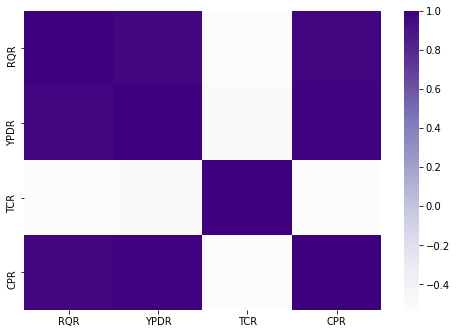

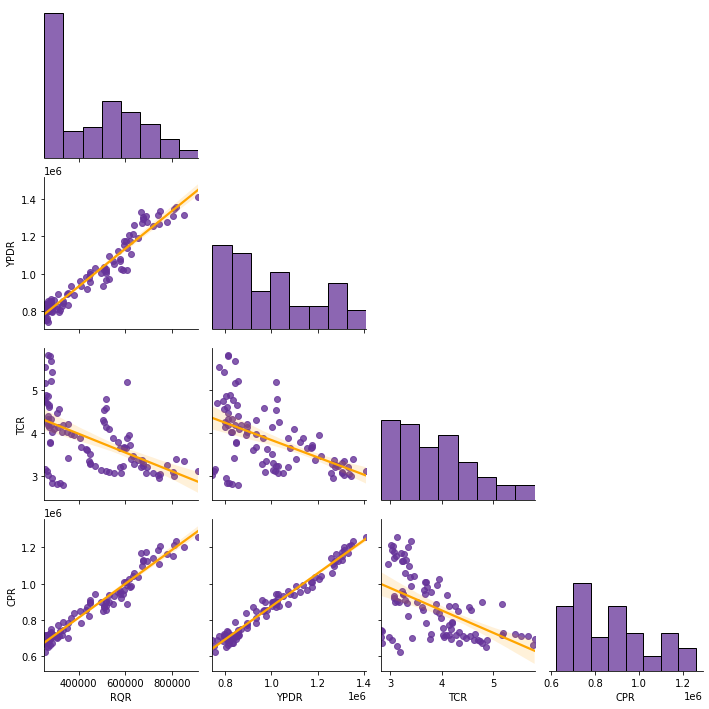

In [15]:
# Graficas de visualización de multicolinealidad
# Gráficas dispersion y correlación

plt.figure(figsize=(8,5.5))
sns.heatmap(cor_matrixP1_not_log, cmap='Purples')
sns.pairplot(dataP1_not_log, kind="reg", corner = True,
    plot_kws={'line_kws':{'color':'orange'}, 'scatter_kws': {'color': 'rebeccapurple'}},
    diag_kws={'color': 'rebeccapurple'})

Aqui observamos un comportamiento similar a los incisos anteriores. La respuesta $CPR$ muy correlacionada con $RQR$ y $YPDR$, pero estas variables muy correlacionadas entre sí.

In [16]:
# Numero de condición y factores de inflación
variables_P1_not_log=dataP1_not_log.drop('CPR',axis=1)
Z=variables_P1_not_log.corr()

invZ=np.linalg.inv(Z)

print('Matriz de correlaciones:')
print(Z)
eigs = np.linalg.eigvals(Z)
condition_number = np.sqrt(eigs.max() / eigs.min())
print('\nNumero de condicion:')
print(condition_number)
print('\nFactores de inflación de la varianza')
print(np.diag(invZ))


Matriz de correlaciones:
           RQR      YPDR       TCR
RQR   1.000000  0.969547 -0.525176
YPDR  0.969547  1.000000 -0.502456
TCR  -0.525176 -0.502456  1.000000

Numero de condicion:
8.85400430032737

Factores de inflación de la varianza
[17.22811 16.69003  1.38229]


El número de condición no nos brinda evidencia de un problema de multicolinealidad al igual que en el análisis anterior. Sin embargo los factores de inflación nos brindan la misma interpretación. Debemos considerar los modelos de regresión seleccionando solo una de las variables $RQR,YPDR$ junto con la variable $TCR$. El resultado de las regresiones es el siguiente

Para el modelo 
\begin{equation}
\label{modelo 3}
CPR=\beta_0+\beta_1RQR+\beta_2TCR+\varepsilon
\end{equation}

In [22]:
Xmodel_RQR=np.column_stack([np.ones(dataP1_not_log.shape[0]),dataP1_not_log['RQR'],dataP1_not_log['TCR']])
model_RQR=sm.OLS(dataP1_not_log['CPR'],Xmodel_RQR).fit() 
model_RQR.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.952     
Dependent Variable: CPR              AIC:                2301.0526 
Date:               2021-05-01 11:49 BIC:                2308.7457 
No. Observations:   96               Log-Likelihood:     -1147.5   
Df Model:           2                F-statistic:        935.4     
Df Residuals:       93               Prob (F-statistic): 2.55e-62  
R-squared:          0.953            Scale:              1.4585e+09
-------------------------------------------------------------------
         Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
-------------------------------------------------------------------
const 464845.3409 31845.4346 14.5969 0.0000 401606.6191 528084.0628
x1         0.9237     0.0255 36.2889 0.0000      0.8731      0.9742
x2     -5983.8470  6173.0229 -0.9694 0.3349 -18242.2471   6274.5531
-------------------------------------------------------------------
Omnibus:              0.086        Durbin-Watson:           1.003  
Prob(Omnibus):        0.958        Jarque-Bera (JB):        0.053  
Skew:                 0.050        Prob(JB):                0.974  
Kurtosis:             2.944        Condition No.:           4126569
===================================================================
* The condition number is large (4e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

Y para el modelo 
\begin{equation}
\label{modelo 4}
CPR=\beta_0+\beta_1YPDR+\beta_2TCR+\varepsilon
\end{equation}

In [23]:
Xmodel_YPDR=np.column_stack([np.ones(dataP1_not_log.shape[0]),dataP1_not_log['YPDR'],dataP1_not_log['TCR']])
model_YPDR=sm.OLS(dataP1_not_log['CPR'],Xmodel_YPDR).fit() 
model_YPDR.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.972     
Dependent Variable: CPR              AIC:                2248.9822 
Date:               2021-05-01 11:49 BIC:                2256.6752 
No. Observations:   96               Log-Likelihood:     -1121.5   
Df Model:           2                F-statistic:        1642.     
Df Residuals:       93               Prob (F-statistic): 2.83e-73  
R-squared:          0.972            Scale:              8.4790e+08
-------------------------------------------------------------------
          Coef.     Std.Err.     t    P>|t|     [0.025     0.975]  
-------------------------------------------------------------------
const   23432.6443 31571.5567  0.7422 0.4598 -39262.2103 86127.4988
x1          0.8934     0.0185 48.2927 0.0000      0.8567     0.9301
x2     -11219.2143  4632.6219 -2.4218 0.0174 -20418.6832 -2019.7454
-------------------------------------------------------------------
Omnibus:               2.079       Durbin-Watson:          1.362   
Prob(Omnibus):         0.354       Jarque-Bera (JB):       1.844   
Skew:                  0.224       Prob(JB):               0.398   
Kurtosis:              2.489       Condition No.:          10843327
===================================================================
* The condition number is large (1e+07). This might indicate
strong multicollinearity or other numerical problems.
"""

Al igual que en el caso anterior el modelo en \eqref{modelo 4} tiene mejor desempeño considerando el $R^2$ ajustado y el AIC. Tenemos lo mismo para el intercepto, sin embargo dejamos el intercepto siguiente el modelo propuesto por los econometristas.

Hacemos ahora la regresión Ridge para comparar con el modelo en \eqref{modelo 4}

In [30]:
# Estimacion para el parámetro de sesgo CV

XmodelP1_complete=dataP1_not_log.drop('CPR',axis=1)
YmodelP1_complete=dataP1_not_log['CPR']
n_lambdas=200
lambdas = np.logspace(-5, 5, n_lambdas)
model_ridge_P1_CV = RidgeCV(alphas=lambdas,fit_intercept=True).fit(XmodelP1_complete, YmodelP1_complete)
R2_ridge=model_ridge_P1_CV.score(XmodelP1_complete,YmodelP1_complete)
hat_y_CV=model_ridge_P1_CV.predict(XmodelP1_complete)


print('K_CV:')
print(model_ridge_P1_CV.alpha_)
print('\nParametros Ridge Problema 1 (CV)')
print(model_ridge_P1_CV.coef_)
print('\nR2 Problema 1 (CV Auto)')
print(R2_ridge)
MSE_CV = mean_squared_error(YmodelP1_complete, hat_y_CV)
print('\nCoeficientes Ridge Problema 1 (CV):')
print(model_ridge_P1_CV.coef_)
print('\nIntercepto Ridge Problema 1 (CV)')
print(model_ridge_P1_CV.intercept_)
print('\nError cuadrático medio Problema 1 (CV):')
print(MSE_CV)

K_CV:
19.116440753857038

Parametros Ridge Problema 1 (CV)
[    0.31567     0.60946 -4936.19244]

R2 Problema 1 (CV Auto)
0.9784129260886852

Coeficientes Ridge Problema 1 (CV):
[    0.31567     0.60946 -4936.19244]

Intercepto Ridge Problema 1 (CV)
135684.3376583903

Error cuadrático medio Problema 1 (CV):
644036907.3080333


Y el error cuadrático medio para el modelo en \eqref{modelo 4} resulta en 

In [31]:
hat_y_YPDR=model_lydr.predict(Xmodel_YPDR)
MSE_YPDR = mean_squared_error(YmodelP1_complete, hat_y_YPDR)
print('\nError cuadrático medio Problema 1 (Modelo 4):')
print(MSE_YPDR)


Error cuadrático medio Problema 1 (Modelo 4):
21959151826.137234


Resulta igual que en el análisis anterior presenta menor el modelo Ridge, sin embargo el error comparado con la escala de la respuesta es muy grande, a diferencia de la escala logaritmica, aquí el error no es aceptable, por lo que este modelo presenta un pobre desempeño.  


# Problema 2 #

## inciso a)##

In [33]:
dataP2=pd.read_csv('Fat.csv')
#dataP2.head()

Dada la cantidad de variables predictivas, no mostraremos la matriz de correlación con números, sino la representación gráfica, para evaluar mejor la existencia de correlaciones entre variables predictivas y con la respuesta.

<AxesSubplot:>

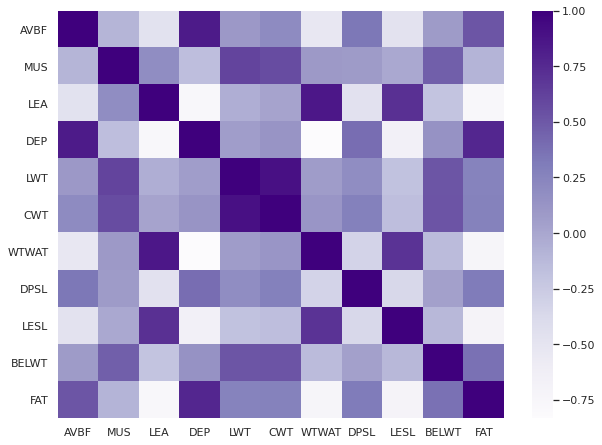

In [40]:
cor_matrixP2=dataP2.corr()
# Gráficas dispersion y correlación

plt.figure(figsize=(10,7.5))
sns.heatmap(cor_matrixP2, cmap='Purples')

In [41]:
# Numero de condición y factores de inflación
variables_P2=dataP2.drop('FAT',axis=1)
Z=variables_P2.corr()

invZ=np.linalg.inv(Z)
eigs = np.linalg.eigvals(Z)
condition_number = np.sqrt(eigs.max() / eigs.min())
print('\nNumero de condicion:')
print(condition_number)
print('\nFactores de inflación de la varianza')
print(np.diag(invZ))


Numero de condicion:
11.418667929393273

Factores de inflación de la varianza
[ 5.46424  2.84934  8.0072  17.37511  8.00393 10.47442 12.15002  1.88904
  2.66955  2.05355]


Tenemos varias variables con factores de inflación preocupantes mayores a $10$, puntualmente las variables DEP, CWT y WTWAT. Considerando un corte en mayor a $5$ las otras variables que podrían ser fuente de correlación serían AVBF, LEA, y LWT . Haremos una visualización de estas variables, considerando correlaciones entre ellas.

## inciso b)##

Para ver que variables podemos eliminar, visualiualizaremos la matriz de correlación de las variables con factores de inflación altos.

<AxesSubplot:>

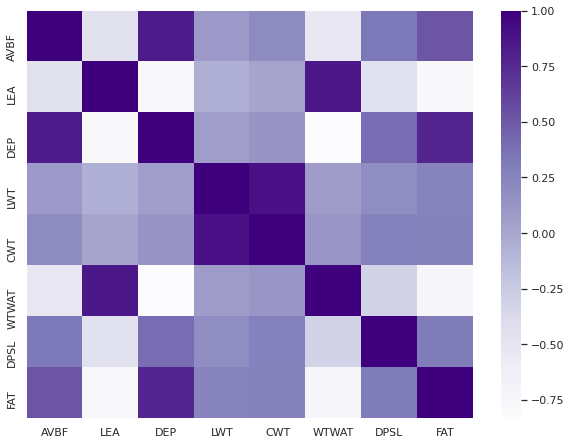

In [42]:
variables_P2_inflacion=dataP2[['AVBF', 'LEA', 'DEP', 'LWT', 'CWT', 'WTWAT', 'DPSL', 'FAT']]
cor_matrixP2_inflacion=variables_P2_inflacion.corr()
# Gráficas dispersion y correlación

plt.figure(figsize=(10,7.5))
sns.heatmap(cor_matrixP2_inflacion, cmap='Purples')


Los bloques de matrices de variables altamente correlacionas estan formadas por las variables (AVBF, DEP), (AVBF,WTWAT),(LEA, DEP), (LEA,WTWAT), (DEP, WTWAT), (LWT, CWT). Las variables más correlacionadas con la respuesta FAT son: WTWAT, DEP, LEA, LESL. Por lo que podemos eliminar AVBF,DEP, LEA y alguna entre LWT y CWT.

## inciso c) ##

Bajo estas observaciones proponemos el modelo con las variables MUS,CWT,WTWAT, LESL y BELWT, aunque esta última no tenga una correlación tan alta con la respuesta, pero no esta inmersa en un problema de multicolinealidad. 

Se tiene así el modelo reducido
\begin{equation*}
FAT=\beta_0+\beta_1MUS+\beta_2CWT+\beta_3WTWAT+\beta_4LESL+\beta_5BELTWT
\end{equation*}

Probamos también con la variable DPSL, pero no fue significativa. Además probamos con CWT o con LWT, el que tuvo mejor comportamiento fue CWT. Probamos quitando BELWT por no tener tan alta correlación con la respuesta, pero perdimos poder en el $R^2$ ajustado. Este fue el mejor modelo de los que probamos.

In [75]:
Xmodel_Red=np.column_stack([np.ones(dataP2.shape[0]),dataP2['MUS'],dataP2['CWT'],dataP2['WTWAT'],dataP2['LESL'],dataP2['BELWT']])
model_Red=sm.OLS(dataP2['FAT'],Xmodel_Red).fit() 
model_Red.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.752   
Dependent Variable: FAT              AIC:                215.3601
Date:               2021-05-01 13:22 BIC:                226.2000
No. Observations:   45               Log-Likelihood:     -101.68 
Df Model:           5                F-statistic:        27.70   
Df Residuals:       39               Prob (F-statistic): 7.33e-12
R-squared:          0.780            Scale:              6.1987  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     39.5767     8.4095    4.7062   0.0000   22.5669   56.5864
x1        -0.8592     0.2223   -3.8654   0.0004   -1.3088   -0.4096
x2         0.2116     0.0596    3.5531   0.0010    0.0912    0.3321
x3        -6.0167     1.2974   -4.6376   0.0000   -8.6408   -3.3925
x4        -0.5286     0.2693   -1.9628   0.0568   -1.0734    0.0161
x5         1.0210     0.4026    2.5358   0.0153    0.2066    1.8354
-----------------------------------------------------------------
Omnibus:               0.186        Durbin-Watson:          1.963
Prob(Omnibus):         0.911        Jarque-Bera (JB):       0.368
Skew:                  -0.110       Prob(JB):               0.832
Kurtosis:              2.616        Condition No.:          4006 
=================================================================
* The condition number is large (4e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

## inciso d) ##

In [78]:
# Estimacion para el parámetro de sesgo CV

XmodelP2_complete=dataP2.drop('FAT',axis=1)
YmodelP2_complete=dataP2['FAT']
n_lambdas=200
lambdas = np.logspace(-5, 5, n_lambdas)
model_ridge_P2_CV = RidgeCV(alphas=lambdas,fit_intercept=True).fit(XmodelP2_complete, YmodelP2_complete)
R2_ridge=model_ridge_P2_CV.score(XmodelP2_complete,YmodelP2_complete)
hat_y_CV=model_ridge_P2_CV.predict(XmodelP2_complete)


print('K_CV:')
print(model_ridge_P2_CV.alpha_)
print('\nR2 Problema 2 (CV Auto)')
print(R2_ridge)
MSE_CV = mean_squared_error(YmodelP2_complete, hat_y_CV)
print('\nCoeficientes Ridge Problema 2 (CV):')
print(model_ridge_P2_CV.coef_)
print('\nIntercepto Ridge Problema 2 (CV)')
print(model_ridge_P2_CV.intercept_)
print('\nError cuadrático medio Problema 2 (CV):')
print(MSE_CV)

K_CV:
3.7834626171319328

R2 Problema 2 (CV Auto)
0.7757794087414716

Coeficientes Ridge Problema 2 (CV):
[ 0.20206 -0.67841 -1.42413  1.51531  0.03356  0.12205 -1.92297 -0.20142
 -0.70314  0.99359]

Intercepto Ridge Problema 2 (CV)
36.48047806992781

Error cuadrático medio Problema 2 (CV):
5.482471379077965


Segun Ridge fue sensato eliminar las variables AVBF, LWT, DPSL, pues son las que tienen mayor reestricción. Y como decimos eliminar las variables con problemas de correlación entre ellas que en este caso fueron LEA, DEP, WTWAT, estas tienen la casi la misma magnitud según Ridge, la que dejamos en nuestro modelo propuesto fue WTWAT, que es la de mayor valor absoluto entre estas variables.  

Y el error cuadrático en el modelo reducido que presentamos en el inciso anterior fue

In [77]:
hat_y_Red=model_Red.predict(Xmodel_Red)
MSE_Red = mean_squared_error(YmodelP2_complete, hat_y_Red)
print('\nError cuadrático medio Problema 2 (Modelo Reducido):')
print(MSE_Red)


Error cuadrático medio Problema 2 (Modelo Reducido):
5.372189743176645


Comparando los errores el modelo de mejor desempeño fue el reducido, aunque practicamente la diferencia no es tanta.